In [1]:
from dotenv import load_dotenv

load_dotenv()

True

## state 만들기

In [ ]:
from typing import TypedDict #이게 정확히 어떤 용도?

# 상태(Schema) 정의 : 사용자 선호도, 추천 메뉴, 메뉴 정보
class MenuState(TypedDict):
    user_preference : str # 이렇게 str작성하는 것도 정확히 어떤 의미인지?
    recommended_menu : str
    menu_info: str

## node 만들기

state를 받아서 변경하고 state를 return

In [12]:
import random

def get_user_perference(state : MenuState) -> MenuState:
    print("-- 랜덤 사용자 선호도 생성--")
    preferences = ['육류', '해산물','채식','아무거나']
    preference = random.choice(preferences)
    print(f"생성된 선호도 : {preference}")

    return {"user_preference" : preference} # 이렇게 넣으면 Menustate를 바꾸는거야? -> 파이썬 기본 문법이 원래 이래? -> 랭그래프 병합 문법이라고 함.

In [14]:
def recommend_menu(state : MenuState) -> MenuState:
    print("-- 메뉴 추천 --")
    preference = state['user_preference'] # state를 사용해서 접근해야함. state라는 매개변수 이름으로 받아왔으니까
    if preference == "육류":
        menu = '스테이크'
    elif preference == "해산물":
        menu = '랍스타'
    elif preference == "채식":
        menu = '그린 샐러드'
    else:
        menu = '오늘의 쉐프 특선'

    print(f"오늘의 추천 메뉴 : {menu}")

    return {"recommended_menu" : menu}


In [15]:
def provide_menu_info(state: MenuState) -> MenuState:
    print("---메뉴 정보 제공---")
    menu = state['recommended_menu']
    if menu == "스테이크":
        info = "최상급 소고기로 만든 juicy한 스테이크입니다. 가격: 30,000원"
    elif menu == "랍스터 파스타":
        info = "신선한 랍스터와 al dente 파스타의 조화. 가격: 28,000원"
    elif menu == "그린 샐러드":
        info = "신선한 유기농 채소로 만든 건강한 샐러드. 가격: 15,000원"
    else:
        info = "쉐프가 그날그날 엄선한 특별 요리입니다. 가격: 35,000원"
    print(f"메뉴 정보: {info}")
    
    return {"menu_info": info}

In [16]:
from langgraph.graph import StateGraph, START, END

builder = StateGraph(MenuState) # 그래프에서 어떤 state 자료형이 공유되는지

builder.add_node("get_user_perference", get_user_perference)
builder.add_node("recommend_menu", recommend_menu)
builder.add_node("provide_menu_info", provide_menu_info)

builder.add_edge(START, "get_user_perference")
builder.add_edge("get_user_perference", "recommend_menu")
builder.add_edge("recommend_menu", "provide_menu_info")
builder.add_edge("provide_menu_info", END)

graph = builder.compile()

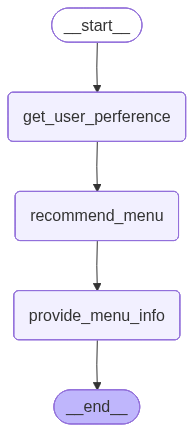

In [8]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [17]:
def print_result(result: MenuState):
    print("\n --- 결과---")
    print("\n 선호도 : ", result["user_preference"])
    print("\n 추천 메뉴 : ", result["recommended_menu"])
    print("\n 메뉴 설명 : ", result["menu_info"])
    print("="*40)

inputs = {"user_preference": ""} #invoke 호출 시에 최소한의 키가 있어야 한다.

for _ in range(2):
    result = graph.invoke(inputs)
    print_result(result)
    print()

-- 랜덤 사용자 선호도 생성--
생성된 선호도 : 채식
-- 메뉴 추천 --
오늘의 추천 메뉴 : 그린 샐러드
---메뉴 정보 제공---
메뉴 정보: 신선한 유기농 채소로 만든 건강한 샐러드. 가격: 15,000원

 --- 결과---

 선호도 :  채식

 추천 메뉴 :  그린 샐러드

 메뉴 설명 :  신선한 유기농 채소로 만든 건강한 샐러드. 가격: 15,000원

-- 랜덤 사용자 선호도 생성--
생성된 선호도 : 육류
-- 메뉴 추천 --
오늘의 추천 메뉴 : 스테이크
---메뉴 정보 제공---
메뉴 정보: 최상급 소고기로 만든 juicy한 스테이크입니다. 가격: 30,000원

 --- 결과---

 선호도 :  육류

 추천 메뉴 :  스테이크

 메뉴 설명 :  최상급 소고기로 만든 juicy한 스테이크입니다. 가격: 30,000원

